<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.693663,73.255736,33.971457,31.564082,2.379889,246.864827,243.377687,3.487140
1,0.0,1.0,72.513309,54.270396,40.618687,46.069838,-9.674340,213.797890,222.521927,-8.724038
2,0.0,2.0,70.038957,94.224730,30.229668,80.734542,-4.528219,280.699679,282.647286,-1.947607
3,0.0,3.0,80.866084,41.118812,94.184604,83.611264,11.076867,320.857632,312.986051,7.871581
4,0.0,4.0,48.045449,20.154178,48.783474,84.118927,3.152277,214.254306,210.846588,3.407718
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,77.332809,42.564420,44.668475,86.820066,1.667887,263.053657,261.583559,1.470098
59996,999.0,56.0,30.651405,23.965276,30.254074,80.311253,2.809540,177.991548,178.619674,-0.628126
59997,999.0,57.0,82.521312,51.931073,82.683569,61.348988,2.947878,291.432821,288.246260,3.186560
59998,999.0,58.0,34.317618,98.238086,96.889048,32.238547,-2.650656,269.032643,270.038675,-1.006033


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.693663  73.255736  33.971457  31.564082   2.379889   
      1.0    72.513309  54.270396  40.618687  46.069838  -9.674340   
      2.0    70.038957  94.224730  30.229668  80.734542  -4.528219   
      3.0    80.866084  41.118812  94.184604  83.611264  11.076867   
      4.0    48.045449  20.154178  48.783474  84.118927   3.152277   
...                ...        ...        ...        ...        ...   
999.0 55.0   77.332809  42.564420  44.668475  86.820066   1.667887   
      56.0   30.651405  23.965276  30.254074  80.311253   2.809540   
      57.0   82.521312  51.931073  82.683569  61.348988   2.947878   
      58.0   34.317618  98.238086  96.889048  32.238547  -2.650656   
      59.0   87.704809  33.999487  58.284591  38.305318   1.701207   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    246.864827  243.377687  3.487140  
      1.0    213.797890  222.521927 -8.724038  
      2.0    280.699679  282.647286 -1.947607  
      3.0    320.857632  312.986051  7.871581  
      4.0    214.254306  210.846588  3.407718  
...                 ...         ...       ...  
999.0 55.0   263.053657  261.583559  1.470098  
      56.0   177.991548  178.619674 -0.628126  
      57.0   291.432821  288.246260  3.186560  
      58.0   269.032643  270.038675 -1.006033  
      59.0   229.995413  227.435884  2.559528  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.693663  73.255736  33.971457  31.564082   2.379889   
      1.0    72.513309  54.270396  40.618687  46.069838  -9.674340   
      2.0    70.038957  94.224730  30.229668  80.734542  -4.528219   
      3.0    80.866084  41.118812  94.184604  83.611264  11.076867   
      4.0    48.045449  20.154178  48.783474  84.118927   3.152277   
...                ...        ...        ...        ...        ...   
999.0 55.0   77.332809  42.564420  44.668475  86.820066   1.667887   
      56.0   30.651405  23.965276  30.254074  80.311253   2.809540   
      57.0   82.521312  51.931073  82.683569  61.348988   2.947878   
      58.0   34.317618  98.238086  96.889048  32.238547  -2.650656   
      59.0   87.704809  33.999487  58.284591  38.305318   1.701207   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    246.864827  243.377687  3.487140  
      1.0    213.797890  222.521927 -8.724038  
      2.0    280.699679  282.647286 -1.947607  
      3.0    320.857632  312.986051  7.871581  
      4.0    214.254306  210.846588  3.407718  
...                 ...         ...       ...  
999.0 55.0   263.053657  261.583559  1.470098  
      56.0   177.991548  178.619674 -0.628126  
      57.0   291.432821  288.246260  3.186560  
      58.0   269.032643  270.038675 -1.006033  
      59.0   229.995413  227.435884  2.559528  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.693663,73.255736,33.971457,31.564082,2.379889,246.864827,243.377687,3.487140
1,0.0,1.0,72.513309,54.270396,40.618687,46.069838,-9.674340,213.797890,222.521927,-8.724038
2,0.0,2.0,70.038957,94.224730,30.229668,80.734542,-4.528219,280.699679,282.647286,-1.947607
3,0.0,3.0,80.866084,41.118812,94.184604,83.611264,11.076867,320.857632,312.986051,7.871581
4,0.0,4.0,48.045449,20.154178,48.783474,84.118927,3.152277,214.254306,210.846588,3.407718
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,77.332809,42.564420,44.668475,86.820066,1.667887,263.053657,261.583559,1.470098
59996,999.0,56.0,30.651405,23.965276,30.254074,80.311253,2.809540,177.991548,178.619674,-0.628126
59997,999.0,57.0,82.521312,51.931073,82.683569,61.348988,2.947878,291.432821,288.246260,3.186560
59998,999.0,58.0,34.317618,98.238086,96.889048,32.238547,-2.650656,269.032643,270.038675,-1.006033


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    95.693663  73.255736  33.971457  31.564082   2.379889   
      1.0    72.513309  54.270396  40.618687  46.069838  -9.674340   
      2.0    70.038957  94.224730  30.229668  80.734542  -4.528219   
      3.0    80.866084  41.118812  94.184604  83.611264  11.076867   
      4.0    48.045449  20.154178  48.783474  84.118927   3.152277   
...                ...        ...        ...        ...        ...   
999.0 55.0   77.332809  42.564420  44.668475  86.820066   1.667887   
      56.0   30.651405  23.965276  30.254074  80.311253   2.809540   
      57.0   82.521312  51.931073  82.683569  61.348988   2.947878   
      58.0   34.317618  98.238086  96.889048  32.238547  -2.650656   
      59.0   87.704809  33.999487  58.284591  38.305318   1.701207   

                      Y       y_hat     e_hat  
rep   index                                    
0.0   0.0    246.864827  243.377687  3.487140  
      1.0    213.797890  222.521927 -8.724038  
      2.0    280.699679  282.647286 -1.947607  
      3.0    320.857632  312.986051  7.871581  
      4.0    214.254306  210.846588  3.407718  
...                 ...         ...       ...  
999.0 55.0   263.053657  261.583559  1.470098  
      56.0   177.991548  178.619674 -0.628126  
      57.0   291.432821  288.246260  3.186560  
      58.0   269.032643  270.038675 -1.006033  
      59.0   229.995413  227.435884  2.559528  

[60000 rows x 8 columns]

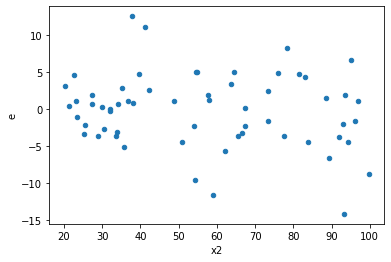

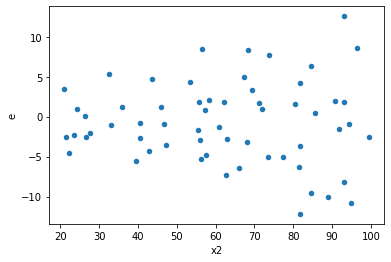

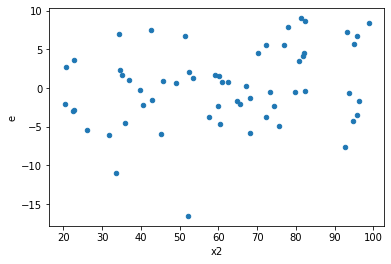

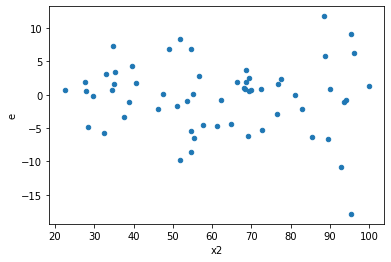

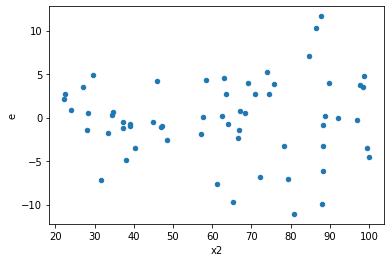

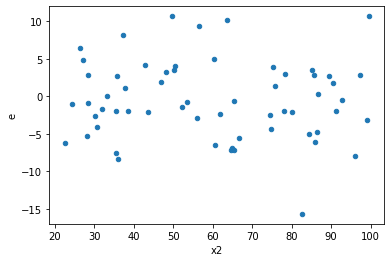

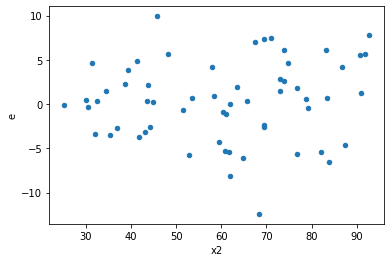

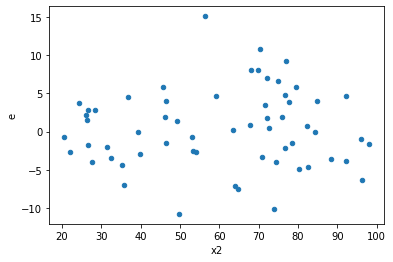

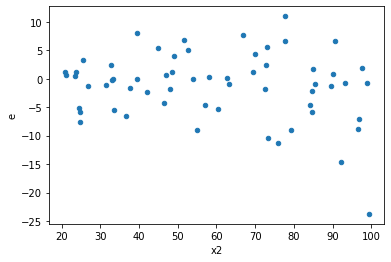

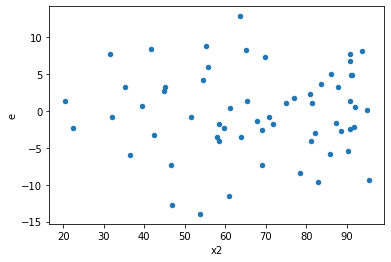

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,26.0,26.0,384.8744185587653,810.2433789639098,14.802862252260203,31.1632068832273,2.1052149477692454,0.06304156690287566,0.9684792165485622,0.03152078345143783,Reject005=1 : Homoscedasticity
2.0,28.0,24.0,510.93130158858304,717.6936330865267,18.247546485306536,29.90390137860528,1.6387902561412728,0.22259870665035342,0.8887006466748233,0.11129935332517671,Reject005=1 : Homoscedasticity
4.0,23.0,29.0,193.2645223872575,873.1112943012228,8.40280532118511,30.107286010386993,3.5830041110771256,0.0014239799224164962,0.9992880100387918,0.0007119899612082481,Reject005=0 : Heteroscedasticity
5.0,25.0,27.0,610.9376143812644,858.2588325071863,24.43750457525058,31.787364166932825,1.3007614615088776,0.5036789525409224,0.7481605237295388,0.2518394762704612,Reject005=1 : Homoscedasticity
12.0,22.0,30.0,399.5067368839292,631.5543215947275,18.15939713108769,21.05181071982425,1.1592791637220674,0.6962179894827811,0.6518910052586094,0.34810899474139056,Reject005=1 : Homoscedasticity
13.0,29.0,23.0,434.1845371835923,372.7869332573184,14.971880592537666,16.208127532926888,1.082571253006479,0.8544900077660849,0.5727549961169576,0.42724500388304243,Reject005=1 : Homoscedasticity
15.0,27.0,25.0,460.0728277280519,826.3463777834188,17.03973436029822,33.05385511133675,1.9398104696016085,0.09991941842433816,0.9500402907878309,0.04995970921216908,Reject005=1 : Homoscedasticity
16.0,35.0,17.0,934.0083513319272,534.67130160275,26.68595289519792,31.45125303545588,1.1785696077247991,0.7363685218105327,0.6318157390947337,0.36818426090526635,Reject005=1 : Homoscedasticity
17.0,24.0,28.0,523.0248673197364,744.2399703935181,21.792702804989016,26.579998942625647,1.2196742726441747,0.6093820298031813,0.6953089850984093,0.3046910149015907,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,26.0,384.8744185587653,810.2433789639098,14.802862252260203,31.1632068832273,2.1052149477692454,0.06304156690287566,Reject005=1 : Homoscedasticity
1.0,25.0,27.0,957.8521610372542,469.45363790990837,38.31408644149017,17.38717177444105,0.45380624697898453,0.05067812383844265,Reject005=1 : Homoscedasticity
2.0,28.0,24.0,510.93130158858304,717.6936330865267,18.247546485306536,29.90390137860528,1.6387902561412728,0.22259870665035342,Reject005=1 : Homoscedasticity
3.0,19.0,33.0,813.8729434032862,567.2652381341959,42.83541807385717,17.18985570103624,0.40130005668200447,0.03875392092902515,Reject005=0 : Heteroscedasticity
4.0,23.0,29.0,193.2645223872575,873.1112943012228,8.40280532118511,30.107286010386993,3.5830041110771256,0.0014239799224164962,Reject005=0 : Heteroscedasticity
5.0,25.0,27.0,610.9376143812644,858.2588325071863,24.43750457525058,31.787364166932825,1.3007614615088776,0.5036789525409224,Reject005=1 : Homoscedasticity
6.0,26.0,26.0,622.0308774427721,341.8148293234998,23.924264517029695,13.146724204749992,0.5495142471523808,0.13338651221040257,Reject005=1 : Homoscedasticity
7.0,24.0,28.0,749.5429373121057,660.3341772412127,31.230955721337736,23.583363472900455,0.755127818800234,0.48811247006793257,Reject005=1 : Homoscedasticity
8.0,33.0,19.0,1466.9062378082776,436.1664262796311,44.45170417600841,22.95612769892795,0.5164285177466355,0.09345061556158697,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      841
Reject005=0 : Heteroscedasticity    159
Name: Result_test, dtype: int64